# Investigating Personal Fitness Data

By: Daniel Best<br>
Email: dabest@umich.edu

# Rule 1: Know Your Audience
The following workbook will analyze and visualize fitness data compiled from the workouts of Professor Chris Brooks.  The goal of this analysis is to learn about the data and uncover some insights that will help Chris improve upon future workouts.

First, I will import packages that will the assist in this analysis and data wrangling.  These include pandas, numpy, regular expression (re), scipy stats.

In [5]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats

In [6]:
import warnings
warnings.filterwarnings('ignore')

Here I will import the visualization packages that will be used.  There is pyplot from matplotlib for basic visualizations, Seaborn for more advanced, well formatted, and easy to create charts, and folium for mapping.  Additionally, I will also show some of the charts included with just pandas.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
# Let's import Folium
import folium

Below, I will read in the csv file, set the index to the timestamp column, tell pandas to automatically parse out the date fields, and replace missing values with the numpy nan (not a number).  I immediately print out the data types in the dataframe and the first 5 rows just to make sure the data is read in correctly and take a quick peek at the what is there.

In [8]:
df = pd.read_csv('assets/strava.csv', index_col='timestamp', parse_dates=True, na_values=np.nan)
df.dtypes

Air Power               float64
Cadence                 float64
Form Power              float64
Ground Time             float64
Leg Spring Stiffness    float64
Power                   float64
Vertical Oscillation    float64
altitude                float64
cadence                 float64
datafile                 object
distance                float64
enhanced_altitude       float64
enhanced_speed          float64
fractional_cadence      float64
heart_rate              float64
position_lat            float64
position_long           float64
speed                   float64
unknown_87              float64
unknown_88              float64
unknown_90              float64
dtype: object

In [9]:
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-07-08 21:04:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,0.000,0.0,68.0,NaN,NaN,0.0,0.0,300.0,NaN
2019-07-08 21:04:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,0.000,0.0,68.0,NaN,NaN,0.0,0.0,300.0,NaN
2019-07-08 21:04:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,NaN,1.316,0.0,71.0,NaN,NaN,1316.0,0.0,300.0,NaN
2019-07-08 21:04:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,249.4,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,0.0,100.0,NaN
2019-07-08 21:04:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,259.6,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,0.0,100.0,NaN


The shape method will tell me exactly how many rows and columns there are in the dataframe, and the describe will automatically calculate summary statistics about the numeric fields in the data.

In [10]:
df.shape

(40649, 21)

In [11]:
df.describe()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90
count,17842.000000,17847.000000,17842.000000,17847.000000,17842.000000,17847.000000,17847.000000,14905.000000,40627.000000,40649.000000,40598.000000,40639.000000,40627.000000,38355.000000,4.045700e+04,4.045700e+04,14928.000000,40627.0,38355.000000,18618.000000
mean,1.872100,77.726565,99.485932,325.934107,13.138571,301.459797,6.458074,3846.184368,72.781254,4097.140051,271.346027,3.037084,0.070138,134.680094,5.045408e+08,-9.995175e+08,2067.483856,0.0,298.513883,-1.067354
std,2.777476,9.202077,13.866222,71.773687,2.039567,48.540552,1.135497,134.262498,17.743728,5827.964663,25.035768,1.959805,0.173639,18.713782,1.690905e+05,1.376341e+06,527.173476,0.0,17.176218,2.820492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3555.000000,0.000000,0.000000,209.000000,0.000000,0.000000,56.000000,5.039868e+08,-1.005696e+09,0.000000,0.0,100.000000,-13.000000
25%,1.000000,78.000000,97.000000,308.000000,13.000000,283.000000,6.125000,3768.000000,74.000000,1117.970000,252.800000,2.109000,0.000000,121.000000,5.044397e+08,-9.993986e+08,1782.000000,0.0,300.000000,-3.000000
50%,1.000000,79.000000,101.000000,326.000000,13.375000,303.000000,6.500000,3829.000000,78.000000,2430.500000,269.200000,2.445000,0.000000,136.000000,5.045116e+08,-9.992608e+08,2071.000000,0.0,300.000000,0.000000
75%,2.000000,80.000000,105.000000,340.000000,13.750000,326.000000,7.000000,3912.000000,80.000000,4403.730000,291.200000,2.809000,0.000000,148.000000,5.046159e+08,-9.990579e+08,2370.000000,0.0,300.000000,0.000000
max,48.000000,88.000000,125.000000,1732.000000,16.875000,462.000000,12.500000,5043.000000,118.000000,39007.120000,508.600000,15.349000,0.500000,183.000000,5.089272e+08,-9.921938e+08,7744.000000,0.0,300.000000,6.000000


In [12]:
# The day of the week with Monday=0, Sunday=6.
weeks = { 0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday',6:'Sunday'}

In [13]:
df.loc[:,'date'] = pd.to_datetime(df.index).date
df.loc[:,'time'] = pd.to_datetime(df.index).time
df.loc[:,'day_of_week'] = pd.to_datetime(df.index).dayofweek.map(weeks)
df

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90,date,time,day_of_week
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-07-08 21:04:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,68.0,NaN,NaN,0.0,0.0,300.0,NaN,2019-07-08,21:04:03,Monday
2019-07-08 21:04:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,68.0,NaN,NaN,0.0,0.0,300.0,NaN,2019-07-08,21:04:04,Monday
2019-07-08 21:04:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,71.0,NaN,NaN,1316.0,0.0,300.0,NaN,2019-07-08,21:04:07,Monday
2019-07-08 21:04:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,77.0,504432050.0,-999063637.0,1866.0,0.0,100.0,NaN,2019-07-08,21:04:14,Monday
2019-07-08 21:04:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,80.0,504432492.0,-999064534.0,1894.0,0.0,100.0,NaN,2019-07-08,21:04:15,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-03 23:04:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,143.0,504554553.0,-999308618.0,NaN,0.0,300.0,NaN,2019-10-03,23:04:54,Thursday
2019-10-03 23:04:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,142.0,504553919.0,-999309466.0,NaN,0.0,300.0,NaN,2019-10-03,23:04:56,Thursday
2019-10-03 23:04:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,142.0,504553588.0,-999309432.0,NaN,0.0,300.0,NaN,2019-10-03,23:04:57,Thursday


# Histograms
Now that I've taken a look at the data, and calculated some statistics on the numeric fields, I want to plot some histograms for those numeric fields.  I will write some code below that will automatically create a list of the numeric fields column names in preparation for the charts.

In [14]:
df.columns

Index(['Air Power', 'Cadence', 'Form Power', 'Ground Time',
       'Leg Spring Stiffness', 'Power', 'Vertical Oscillation', 'altitude',
       'cadence', 'datafile', 'distance', 'enhanced_altitude',
       'enhanced_speed', 'fractional_cadence', 'heart_rate', 'position_lat',
       'position_long', 'speed', 'unknown_87', 'unknown_88', 'unknown_90',
       'date', 'time', 'day_of_week'],
      dtype='object')

In [15]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
len(numerical_columns)

20

Now that we have a list of the numeric columns, it's time to plot the histograms.  I have decided to overlay a normal distribution over the histograms to more easily see if the distribution is normal or not.<br>
<br>
# Rule 5: Do Not Trust the Defaults
Using subplots, the code below loops through all the possible coordinates for the plots and creates the histograms.  Additionally, I am adding a legend that includes the field name and the count of observations.  I resize the frame and set the number of bins to 100.  If I do not increase the bin sise, I will miss out on the bimodal distribution of speed.

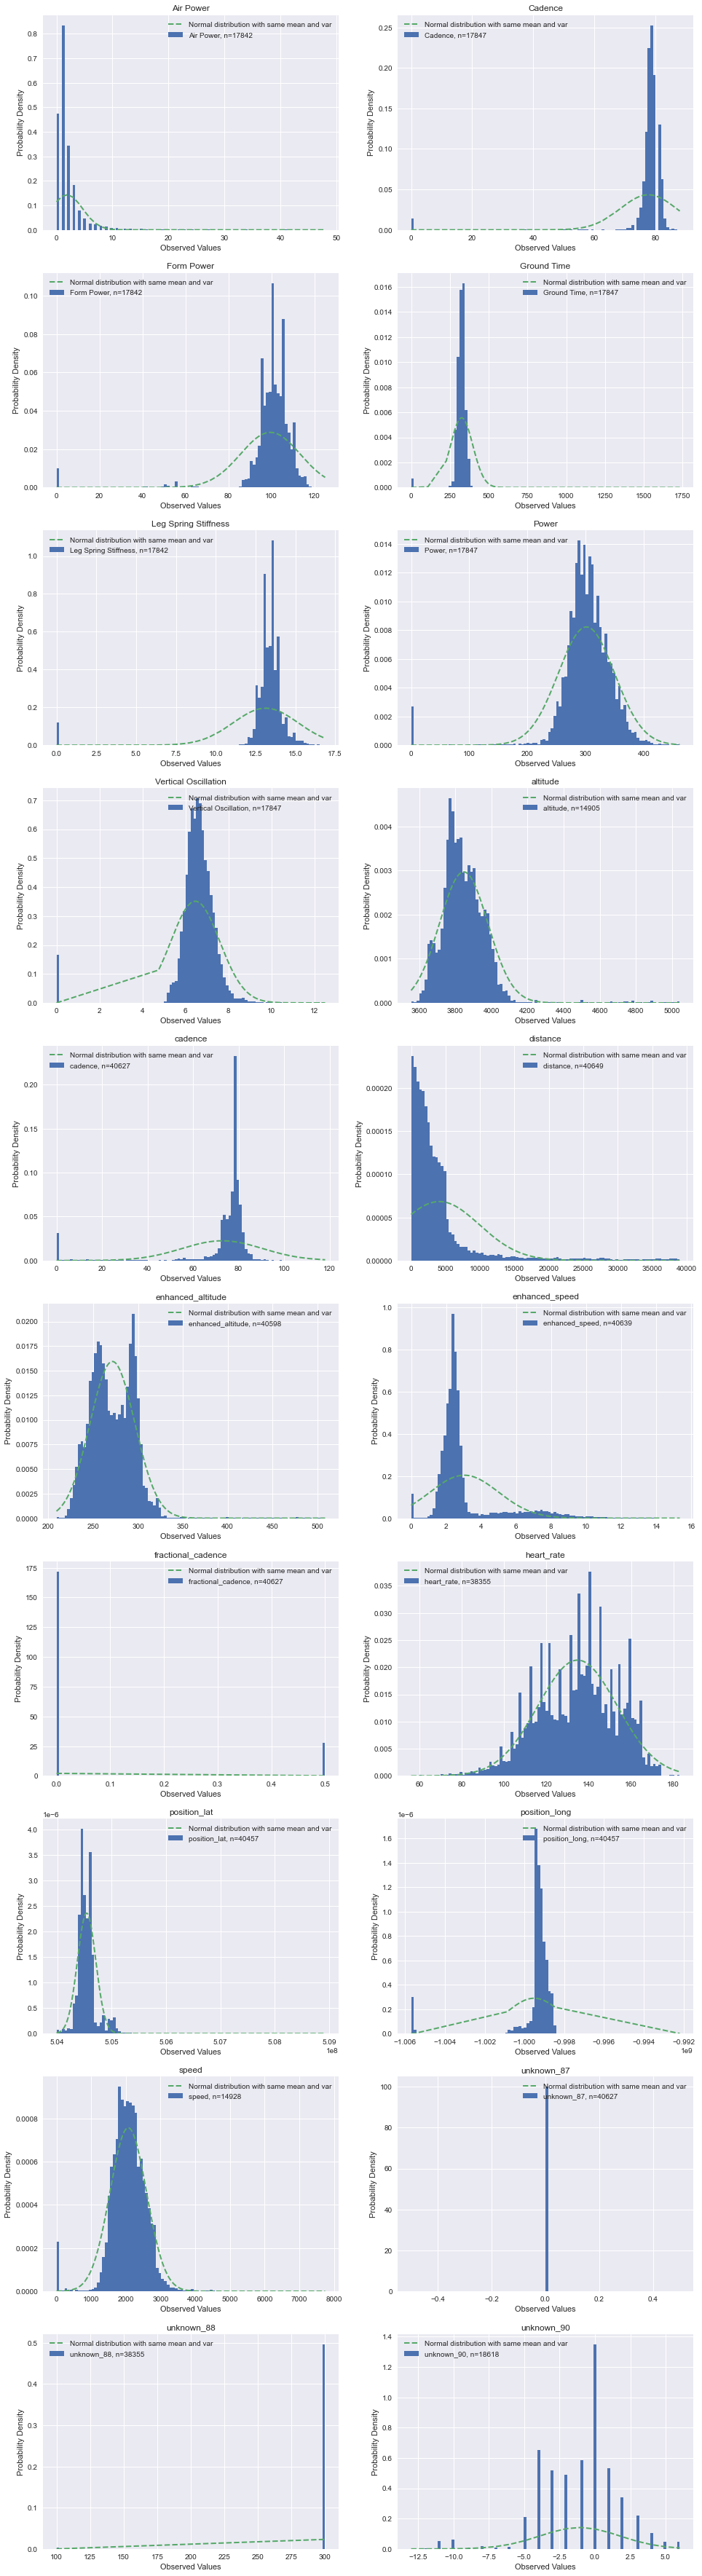

In [16]:
y = int(len(numerical_columns)/2)

num_cols = np.array(numerical_columns).reshape(y,2)
fig, axs = plt.subplots(y, 2)
plt.gcf().set_size_inches(16,64)
for y in range(y):
    for x in range(2):
        data = df[num_cols[y,x]].dropna()
        axs[y, x].hist(data,density=True, label=num_cols[y,x]+', n='+str(len(data)), bins=100)
        axs[y, x].set_title(num_cols[y,x])
        axs[y, x].set_xlabel("Observed Values")
        axs[y, x].set_ylabel("Probability Density")

        sw = np.asarray(data)
        sw = sorted(sw)

        fit = stats.norm.pdf(sw, np.mean(sw), np.std(sw))

        #Now, we can plot both series on the histogram
        axs[y, x].plot(sw,fit,"--", linewidth = 2, label="Normal distribution with same mean and var")
        axs[y, x].legend()


Upon reviewing the histograms, I notice two things right off the bat.  First, the enhanced speed field seems to be bimodal, while the speed field is not.  The second thing of interest is that some fields appear to be redundant or unknown, so some cleanup of the columns may be in order.<br>
<br>
The enhanced speed field is more fully populated, so this data is likely gathered from a device that Chris wore while running and cycling.  I will first re-plot the histogram below, and then I will apply some logic to label workouts as either Running or Cycling.

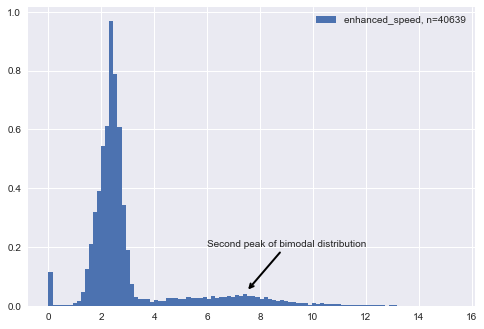

In [17]:
data = df["enhanced_speed"].dropna()
plt.hist(data,density=True, label='enhanced_speed'+', n='+str(len(data)), bins=100)
plt.legend()
 # I'm going to make a call-out to this message and drop it on our plot as well
plt.annotate('Second peak of bimodal distribution' ,
         xy=(7.5, .05), xycoords='data', xytext=(6, .2), textcoords='data', 
         arrowprops=dict(arrowstyle='->, head_width=0.2', linewidth=2));

This is clearly a bimodal distribution, just not blatantly noticable in the histogram.  I will calculate the min, max, and average speeds of the workouts.  Since cycling has much higher attainable speeds than running, I am hoping this will clearly show a split between the cycling and running exercises.  First I will use groupby and aggregate to caclulate these metrics below.

In [18]:
df_min_max = df.groupby('datafile')['enhanced_speed'].agg(['min','max',np.mean])
df_min_max.columns = ['min_speed', 'max_speed', 'avg_speed']

In [19]:
df_min_max

,min_speed,max_speed,avg_speed
datafile,,,
activities/2675855419.fit.gz,0.000,3.144,2.088154
activities/2677658978.fit.gz,0.000,3.210,2.618897
activities/2677658993.fit.gz,2.062,2.781,2.683778
activities/2677659014.fit.gz,2.006,2.781,2.437679
activities/2682705331.fit.gz,1.325,3.480,1.966212
...,...,...,...
activities/2903861013.fit.gz,0.000,13.296,5.508997
activities/2904156632.fit.gz,0.000,13.362,5.473069
activities/2912139332.fit.gz,0.000,13.268,7.069993


Now, I will use the pandas built in plot method to easily plot this line chart.  I will rotate the x labels for readability, after inspection, add an orange cutoff line to clearly distinguish between the running and cycling exercises.

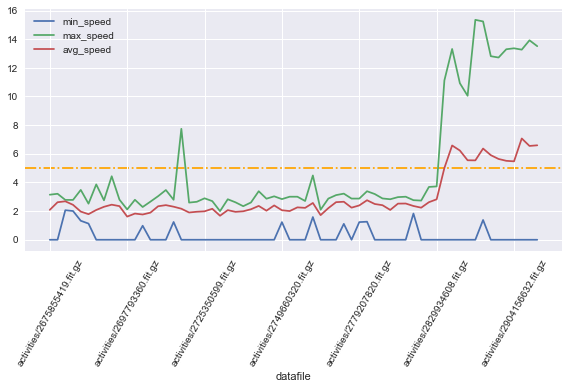

In [20]:
df_min_max.plot(rot=60)
plt.tight_layout()
plt.axhline(5, color='orange', linestyle='-.', zorder=0)
plt.show()

You can see above that on the right hand side of the plot area, there is a spike in both maximum speed and average speed.  I have drawn the orange line at an average speed of 5 m/s, which is over 11 mph.  I would imagine that Professor Brooks is not running with an average pace of 5.5 minutes per mile, so I belief it safe to say that any exercise with an average speed above the orange line can be classified as a cycling activity.<br>
<br>
I will create a categorical flag below by filtering on the average speed, and then I will join this categorical flag on to the full fitness dataset.

In [21]:
df_min_max.loc[df_min_max['avg_speed'] > 5,'activity'] = 'Cycling'
df_min_max.loc[:,'activity'].fillna('Running',inplace=True)

In [22]:
df_labels = df.join(df_min_max,on='datafile')

In [23]:
df_labels

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,unknown_87,unknown_88,unknown_90,date,time,day_of_week,min_speed,max_speed,avg_speed,activity
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-07-08 21:04:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.0,300.0,NaN,2019-07-08,21:04:03,Monday,0.0,3.144,2.088154,Running
2019-07-08 21:04:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.0,300.0,NaN,2019-07-08,21:04:04,Monday,0.0,3.144,2.088154,Running
2019-07-08 21:04:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,0.0,300.0,NaN,2019-07-08,21:04:07,Monday,0.0,3.144,2.088154,Running
2019-07-08 21:04:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,0.0,100.0,NaN,2019-07-08,21:04:14,Monday,0.0,3.144,2.088154,Running
2019-07-08 21:04:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,0.0,100.0,NaN,2019-07-08,21:04:15,Monday,0.0,3.144,2.088154,Running
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-03 23:04:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,0.0,300.0,NaN,2019-10-03,23:04:54,Thursday,0.0,13.511,6.592298,Cycling
2019-10-03 23:04:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,0.0,300.0,NaN,2019-10-03,23:04:56,Thursday,0.0,13.511,6.592298,Cycling
2019-10-03 23:04:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,0.0,300.0,NaN,2019-10-03,23:04:57,Thursday,0.0,13.511,6.592298,Cycling


In the next section I will drop redundant columns and plot a scatter plot matrix

# Scatter Plot Matrix

First, I will make a list of fields to drop.  These fields were identified when I did the histograms above as columns that were either better represented by another column (redundant), did not contain any valuable data, e.g. single value in the column for all rows, or is an unknown field.<br>
<br>
I remove these fields from my previous list of numeric columns, and then I append the new 'activity' column so that I can highlight whether a data point is for running or cycling.

In [24]:
fields_to_drop = ['altitude', 'Cadence', 'fractional_cadence', 'position_lat', 'position_long', 'speed', 'unknown_87', 'unknown_88', 'unknown_90']
numerical_columns2 = numerical_columns.copy()
for f in fields_to_drop:
    numerical_columns2.remove(f)
numerical_columns2.append('activity')
numerical_columns2

['Air Power',
 'Form Power',
 'Ground Time',
 'Leg Spring Stiffness',
 'Power',
 'Vertical Oscillation',
 'cadence',
 'distance',
 'enhanced_altitude',
 'enhanced_speed',
 'heart_rate',
 'activity']

First, I will do the pair plot (scatter plot matrix) on all the numerical columns.  There are a lot of fields to be shown, but it should still be good enough to capture trends.  The color, or 'hue' variations are for the activity, cycling vs running, and as you will see below, not all of the columns recorded data for both activities.<br>
<br>


In [ ]:
sns.pairplot(df_labels.loc[:,numerical_columns2],hue='activity');

It looks like there are some trends with Power and Speed, and also with Power and Ground Time.  I will make a note to review those plots further down below.<br>
<br>
First, I want to do another pair plot with just the columns that have both cycling and running, to see if a closer look will give us any additional insights.<br>
<br>
The code below identifies the columns with the data we want to plot, and then filters the dataframe to just those columns before calling the Seaborn pairplot again.

In [ ]:
cols_both = ['cadence', 'distance', 'enhanced_altitude', 'enhanced_speed', 'heart_rate', 'activity']
sns.pairplot(df_labels.loc[:,cols_both],hue='activity');

It looks like there may be some correlation between enhanced speed and heart rate.  This seems to make sense intuitively that if you are going faster, either running or cycling, that you would have an elevated heart rate.<br>
<br>

# Scatter Plots and Reg Plot (Regression line on scatter)

Below, I will do a Seaborn scatter plot on just the enhanced speed vs heart rate.  The color and style represent the activity, and additionally, I will set an alpha value to .25 to decrease the opacity of the points in hopes to better see the points for Running that were hidden behind the cycling points.

In [ ]:
sns.scatterplot(data=df_labels, x='enhanced_speed', y='heart_rate', hue='activity', style='activity', alpha=.25)

It appears that there may be a positive correlation between speed and heart rate for both cycling and running.  In order to test this hypothesis, I will split the data set on the activity, and run a seaborn regplot for each.  The Reg plot will show the fitted regression line for the data.  If the line is horizontal, there is no correlation between the two columns.  The steeper the slope of the line, the more positive correlation there is.  Let's see how each of them look:

First with The Cycling Data

In [ ]:
sns.regplot(data=df_labels.loc[df_labels['activity']=='Cycling',:], x='enhanced_speed', y='heart_rate')
plt.title('Cycling Data');

Great, so there is a slight positive correlatin between speed and heart rate in cycling.<br>
<br>
Next, I'll to another reg plot for the running data.

In [ ]:
sns.regplot(data=df_labels.loc[df_labels['activity']=='Running',:], x='enhanced_speed', y='heart_rate')
plt.title('Running Data');

Even stronger!  So comparing these two charts shows that there is a stronger positive correlation between speed and heart rate while running than there is between speed and heart rate while cycling.<br>
This may be something to look into further, especially if one or your goals of working out is to maintain a specific heart rate; running may be the better workout if this is a concern.

Now, circling back to the other relationships that were spotted in the SPLOM (scatter plot matrix) above.  Power and speed appeared to have a positive relationship, and power and ground time appeared to have a negative correlation.<br>
<br>

# Rule 6: Use Color Effectively
Below, I will plot the power against speed using the Seaborn scatter plot.  Additionally, I will add a color gradient to the points; the darker the color will represent a higher heart rate.

In [ ]:
sns.scatterplot(data=df_labels, x='Power', y='enhanced_speed', hue='heart_rate', style='activity')
plt.title('Power vs Spead with Heart Rate');

The chart above shows a clear positive correlation between power and speed. The higher the power, the greater the speed.  Additionally, as you move up and to the right on the chart, the points become darker, which indicates that as power and speed increase, in general, heart rate also increases.

Next, I will do another scatter plot with Power vs Ground Time.  Ground time is a measure of how much time a runners feet are on the ground during a stride.  As done previously, I will also add a color gradient to show heart rate, with darker colors representing a higher heart rate.

In [ ]:
sns.scatterplot(data=df_labels, x='Power', y='Ground Time', hue='heart_rate', style='activity')
plt.title('Power vs Ground Time with Heart Rate');

This is a very interesting chart!  There is a negative correlation between power and ground time that is easily seen in the chart.  There is also a relationship with power and heart rate; higher power typically has a higher heart rate as seen by the very dark points on the bottom right hand side of the chart area.<br>
Additionally, it appears that Ground Time plateaus, or bottoms out, right around 250ms.  In other words, that is the minimum ground time Professor Brooks is able to achieve, and all additional power comes at the same ground time.<br>
This may be an area for improvement for Professor Brooks; if he is able to decrease his minimum ground time through cross training, he may be able to add some additional power to his runs.

# Basic Pandas Plots

Below, I am going to show just a few basic charts that are built into pandas and do not need any additionally visualization packages.  If you are working with pandas dataframes, and want a "quick and dirty" way to visualize some of the data, this may be a good option.

Building on what we saw earlier with the Power feature in the scatter plots, I would like to do some additional analysis on Power. I read online that the Form Power Ratio is a very good way to measure your own running effciency.  Over time, as a runner improves, the FPR should gradual decrease.<br>
In order to calculate the FPR, you just divide Form Power by Total Power, both of which are data points in our data set.  Below I will create a new column and name it FPR.

Since this feature is only available on the running data, I will drop the Cycling data from the analysis, and only focus on running data going forward.  The code below filters on running data only and creates FPR.

In [ ]:
df_running = df_labels.loc[(df_labels['activity'] == 'Running')]
df_running['FPR'] = df_running['Form Power'] / df_running['Power']

In [ ]:
df_running

The first basic chart I will create is a box and whiskers plot of the new FPR field.  This will create a box and whiskers plot where the x axis are individual dates of exercise and the y axis are the observed values.  The median of these charts should be decreases over time if running efficiency is improving.

In [ ]:
pivoted = df_running.pivot_table('FPR', index=df_running.index.time, columns=df_running.index.date).replace(0,np.nan)
pivoted.iloc[:25, :5]

In [ ]:
pivoted.boxplot();

It does appear that the median is lower for the final two runs, so maybe there is some improvement there!  I will look into this Power Ratio later on when mapping out specific routes.

Just for fun I am going to add it the day of the week to plot the days of the individual workouts.

Creating a pivot table to calculate the max distance per date

In [ ]:
pivoted = df_running.pivot_table('distance', index='day_of_week', columns=df_running.index.date, aggfunc=max)
pivoted

Below is a simple bar chart showing the Maximum distances ran on each day of the week.

In [ ]:
pivoted.plot.bar(legend=False);

Creating another pivot to calculate distances run by the time of day. 

In [ ]:
pivoted = df_running.pivot_table('distance', index=df_running.index.time, columns=df_running.index.date)
pivoted

The chart below shows the times during the day that Professor Brooks is running.

In [ ]:
pivoted.plot(legend=False, alpha=0.75);

Is Brooks a night owl?  The data says Yes!

# Advanced Visualization: Mapping with Folium

# Rule 10: Get the Right Tool
I will be plotting some of Professor Brooks' runs in order to study some of the metrics throughout the run, including the Power ration.<br>
The Folium tool is perfect for this analysis because it pulls the map each time you create a chart.  This is beneficial, since I do not know exactly where Brooks has been running, so it would be difficult to pull a static map from open maps.  Additionally, if we get new additional data with new routes, it will not break this charting function.

The code below prepares the latitude and longitude values for the analysis.

In [ ]:
df_running["position_lat_degrees"] = df_running["position_lat"] * ( 180 / 2**31 )
df_running["position_long_degrees"] = df_running["position_long"] * ( 180 / 2**31 )


Printing the min and max lat and long values just in case I needed to look up an open source map.  Luckily, the Folium packages reads in a map automatically.

In [ ]:
print('min lat',df_running.position_lat_degrees.min())
print('max lat',df_running.position_lat_degrees.max())

print('min long',df_running.position_long_degrees.min())
print('max long',df_running.position_long_degrees.max())

Below, I am creating a function to plot subplots of interest for the routes.  I put it in a function so it is generalized, and can be used to plot any double line chart.

In [ ]:
def double_line_plot(df, y1, y2,y,x):
   
    
    lineplot = sns.lineplot(x=df.index, y=df[y1], data=df,label = y1, ax=ax[y,x])
#     ax[0,0].set_xticks([x.strftime("%H:%M:%S") for x in df.index.time])
#     lineplot.set(xlim=(year_min-1, year_max+1))
    sns.despine()
#     plt.ylabel(y_label1)
    ax[y,x].set_title(y1 + ' and ' + y2, pad=20)


    ax2 = ax[y,x].twinx()

    lineplot2 = sns.lineplot(x=df.index, y=df[y2], ax=ax2, color="r", label = y2) 
    sns.despine(right=False)
#     plt.ylabel(y_label2)
    ax[y,x].legend(loc='upper left', frameon=True)
    return None


Below is the list of routes to plot, filtering out to include only those with the Stryd data.

In [ ]:
run_list = df_running.loc[np.isnan(df_running['Vertical Oscillation']) != True,:].datafile.unique()
run_list

Now, I will loop through all the routes, Plot the map of the route, and then below the map I will show line plots for  speed, vertical oscillation, ground time, altitude, speed, power, and power ration.  All of these charts together will be valuable for Professor Brooks to track his running efficiency over time.<br>
<br>
The best way to compare the charts is to only include the same route in the analysis so it is like to like comparisons.

In [ ]:

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']
for i,d in enumerate(run_list[-5:]):
    df = df_running.loc[df_running['datafile']==d]
    df.dropna(subset=['position_lat_degrees','position_long_degrees'], inplace=True)
    med_lat = df.position_lat_degrees.median()
    med_long = df.position_long_degrees.median()
    # Now let's render a spot from our previous data, for this we pick the center point of the map and a zoom
    # level
    m=folium.Map(location=[med_lat,med_long], zoom_start=14)
    # A key eye will notice that I had to reverse our longitude and latitude for this library, *and* I'm not using
    # the mercantor changed values for longitude. Welcome to geographical information systems!

    folium.Marker([df["position_lat_degrees"].iloc[0],df["position_long_degrees"].iloc[0]], 
                  popup="Start").add_to(m)
    folium.Marker([df["position_lat_degrees"].iloc[-1],df["position_long_degrees"].iloc[-1]], 
                  popup="Stop").add_to(m)

    # We also want to map the whole running route. The docs for folium point to a PolyLine as the appropriate
    # class to use. The PolyLine takes a list of locations as tuples, which means we have to combine our latiude
    # and longitude values pairwise, and this is easily achieved through the use of python's zip() function
    route=folium.PolyLine(locations=zip(df["position_lat_degrees"],df["position_long_degrees"]),
                        weight=5,color=colors[i%8]).add_to(m)

# Let's take a look at that
    display(m)
    print("Start Time:",df.index[0])
    print("End Time:",df.index[-1])
    print("Duration:",df.index[-1]-df.index[0])
    fig, ax = plt.subplots(2,2,figsize=(16,9))
    double_line_plot(df,'enhanced_speed', 'Vertical Oscillation',0,0)
    double_line_plot(df,'Ground Time', 'enhanced_altitude',1,0)
    double_line_plot(df,'enhanced_speed', 'FPR',0,1)
    double_line_plot(df,'Power', 'enhanced_speed',1,1)
    plt.subplots_adjust(bottom=0.1, top=1.4)
    plt.show()


From the Charts above, it appears that Professor Brooks likes to "sprint to the finish line" at the end of his runs.  Just about all the the runs have a spike in speed right at the end.  This burst in speed is associated with a predictable increase in Power as well; however, his running efficiency is far worse at the end of these runs during this sprint period.  Studying the vertical oscillation, which should be minimized (and should decrease over time if the runner is improving) there is a spike at the end of almost every run.<br>
I admire the sprint at the end of the run, and I myself do it too, but a suggestion would be to try to do it while maintaining an efficient running gait. 